## Model Comparision 

In [1]:
import pandas as pd

In [2]:
nlp_data1=pd.read_csv('nlp_data1.csv')

### Model Selection and Training

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

X = nlp_data1['lemmatized_token']
y = nlp_data1['target']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Evaluating Performance of Classification Models through Cross-Validation

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

# Perform cross-validation for each model
for name, model in models.items():
    print("Model:", name)
    cv_results = cross_validate(model, X_train, y_train, cv=5,
                                scoring=['accuracy', 'precision', 'recall', 'f1'])
    
    # Access the cross-validation results
    accuracy_scores = cv_results['test_accuracy']
    precision_scores = cv_results['test_precision']
    recall_scores = cv_results['test_recall']
    f1_scores = cv_results['test_f1']

    # Print the mean and standard deviation of each metric
    print("Accuracy: mean =", np.mean(accuracy_scores), ", std =", np.std(accuracy_scores))
    print("Precision: mean =", np.mean(precision_scores), ", std =", np.std(precision_scores))
    print("Recall: mean =", np.mean(recall_scores), ", std =", np.std(recall_scores))
    print("F1 Score: mean =", np.mean(f1_scores), ", std =", np.std(f1_scores))
    print("\n")

Model: Logistic Regression
Accuracy: mean = 0.7962233169129721 , std = 0.013099291083861493
Precision: mean = 0.8662054384938396 , std = 0.022060368238868196
Recall: mean = 0.6231857506361324 , std = 0.02248036469587554
F1 Score: mean = 0.7246382104026324 , std = 0.01924596276105079


Model: Decision Tree
Accuracy: mean = 0.7384236453201971 , std = 0.005607018416736915
Precision: mean = 0.7030488499795012 , std = 0.010086273620819385
Recall: mean = 0.6800101781170482 , std = 0.017236204915777854
F1 Score: mean = 0.6911402881258172 , std = 0.008053365955956578


Model: Random Forest
Accuracy: mean = 0.784072249589491 , std = 0.010228184894842327
Precision: mean = 0.8198127996199748 , std = 0.009513575029909706
Recall: mean = 0.6388215194474737 , std = 0.02300504037164623
F1 Score: mean = 0.7179120429363014 , std = 0.016556404887283643


Model: Neural Network
Accuracy: mean = 0.7561576354679802 , std = 0.013084874754112663
Precision: mean = 0.7283589621210503 , std = 0.023022015757916615

Analysis:

Logistic Regression model achieved the highest mean accuracy of approximately 79.62% with a standard deviation of approximately 1.31%. It also attained the highest mean precision of approximately 86.62% and a mean recall of approximately 62.32%. The F1 score, which considers both precision and recall, had a mean value of approximately 72.46%. Overall, Logistic Regression showed balanced performance across accuracy, precision, recall, and F1 score metrics.

Decision Tree model had a lower mean accuracy of approximately 73.84% with a standard deviation of approximately 0.56%. Its mean precision, recall, and F1 score were approximately 70.30%, 68.00%, and 69.11%, respectively. While Decision Tree performed reasonably well, it showed slightly lower performance compared to Logistic Regression in terms of accuracy, precision, recall, and F1 score.

Random Forest model achieved a mean accuracy of approximately 78.41% with a standard deviation of approximately 1.02%. It had a mean precision of approximately 81.98%, a mean recall of approximately 63.88%, and a mean F1 score of approximately 71.79%. Random Forest exhibited competitive performance, especially in terms of precision, but it showed slightly lower recall compared to Logistic Regression.

Neural Network model attained a mean accuracy of approximately 75.62% with a standard deviation of approximately 1.31%. It had a mean precision of approximately 72.84%, a mean recall of approximately 69.30%, and a mean F1 score of approximately 71.00%. While Neural Network demonstrated good overall performance, it fell slightly behind Logistic Regression in terms of accuracy, precision, recall, and F1 score.

Conclusion:
Based on the evaluation of multiple performance metrics including accuracy, precision, recall, and F1 score, the Logistic Regression model emerged as the best performer among the evaluated classification models. It demonstrated the highest mean accuracy, precision, recall, and F1 score, indicating its effectiveness in predicting the target variable.

### Confusion Matrix & Visualizing for Classification Models

Model: Logistic Regression


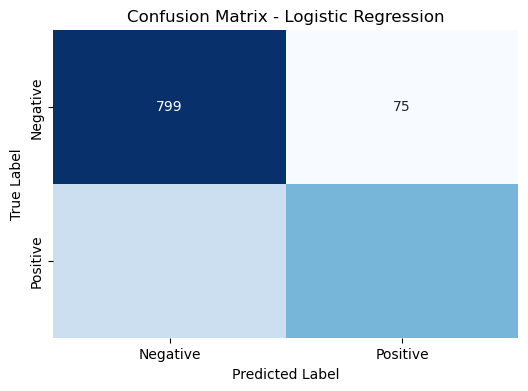

Model: Decision Tree


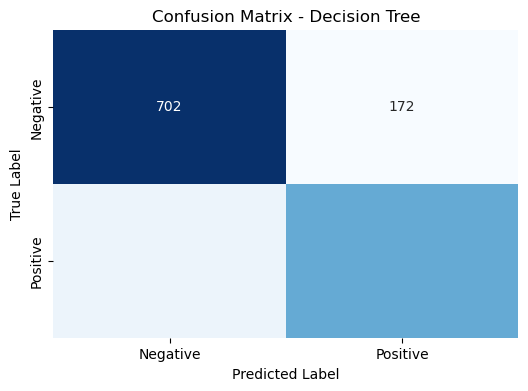

Model: Random Forest


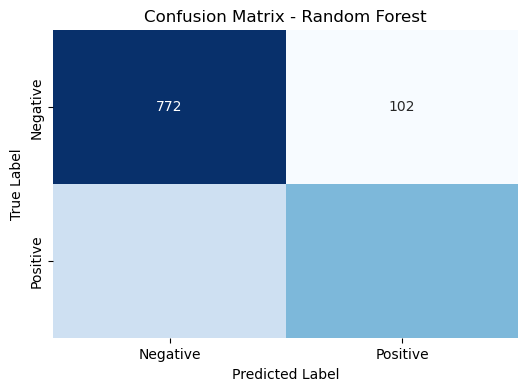

Model: Neural Network


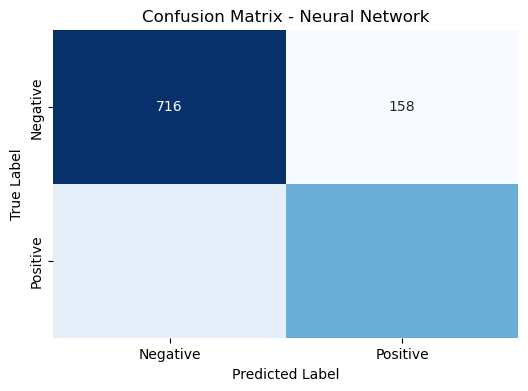

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

# Plot confusion matrices for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix - " + name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

### Visualizing Receiver Operating Characteristic (ROC) Curves for Classification Models

Model: Logistic Regression


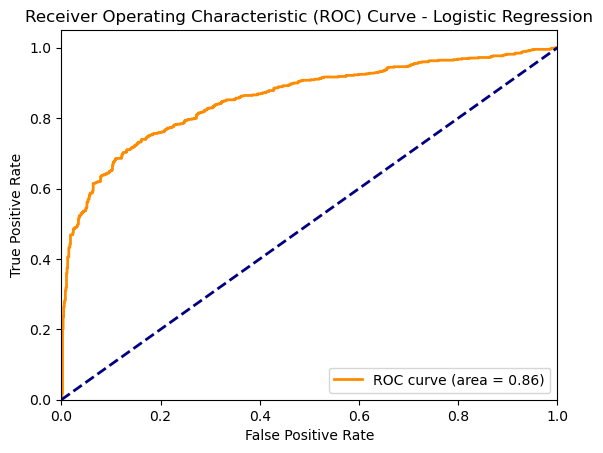

Model: Decision Tree


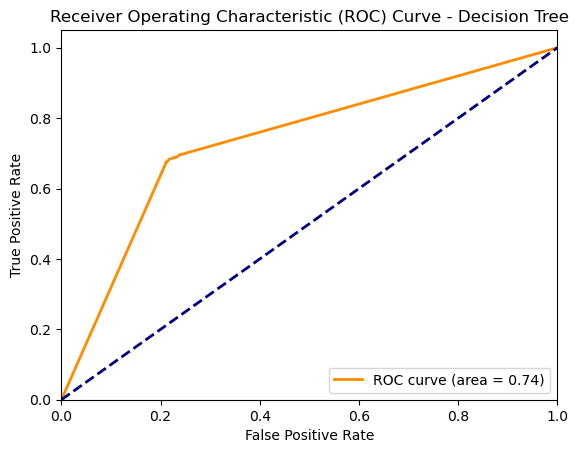

Model: Random Forest


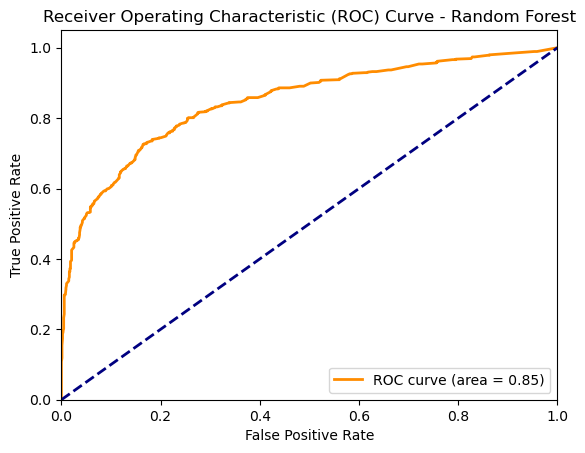

Model: Neural Network


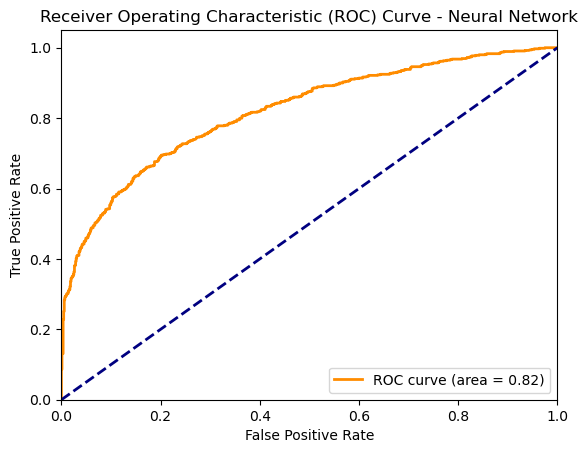

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

# Plot ROC curves for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get probability estimates of the positive class
    y_score = model.predict_proba(X_test)[:,1]  
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + name)
    plt.legend(loc="lower right")
    plt.show()

### Visualizing Precision-Recall Curves for Classification Models

Model: Logistic Regression


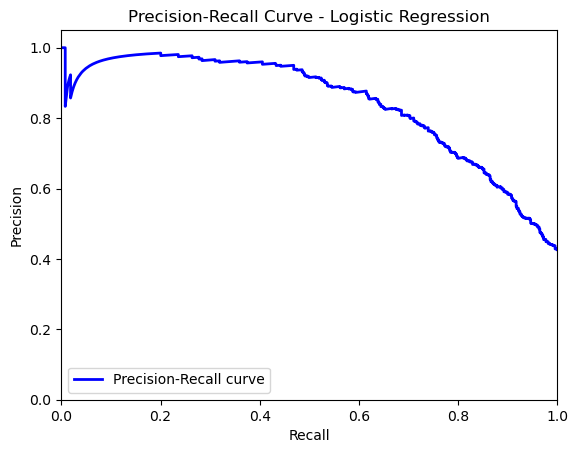

Model: Decision Tree


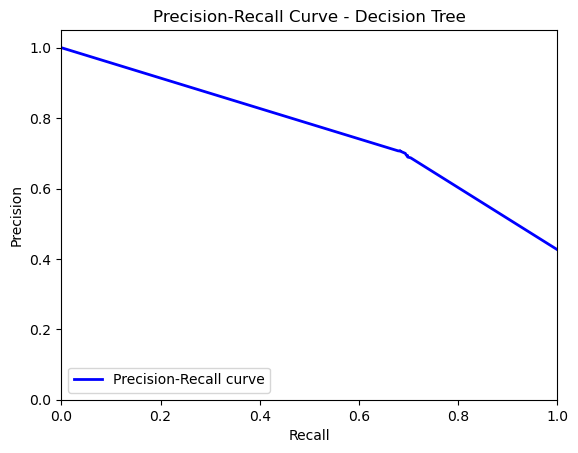

Model: Random Forest


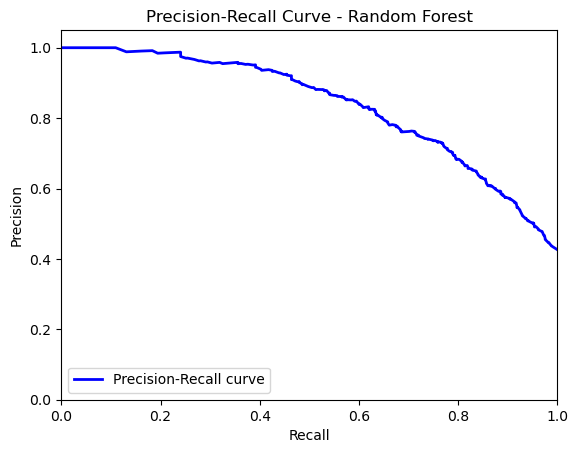

Model: Neural Network


d:\Apps\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


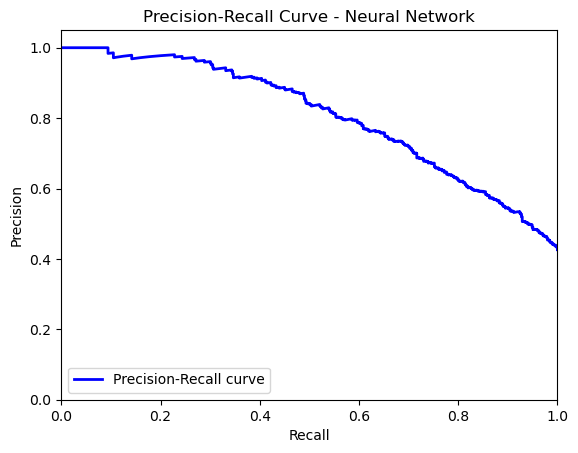

In [7]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

# Plot precision-recall curves for each model
for name, model in models.items():
    print("Model:", name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get probability estimates of the positive class
    y_score = model.predict_proba(X_test)[:,1]  
    
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    # Plot precision-recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve - ' + name)
    plt.legend(loc="lower left")
    plt.show()

### Hyperparameters 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Neural Network': {'hidden_layer_sizes': [(100,), (50, 100), (50, 50, 50)]}
}

# Perform hyperparameter tuning for each model
for name, model in models.items():
    print("Model:", name)
    
    # Define the parameter grid for the current model
    params = param_grid[name]
    
    # Perform grid search using 5-fold cross-validation
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)
    
    # Print the best cross-validation score
    print("Best Cross-validation Score:", grid_search.best_score_)
    
    # Use the best estimator to predict on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Accuracy:", accuracy)

Model: Logistic Regression


d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\App

Best Hyperparameters: {'C': 1}
Best Cross-validation Score: 0.7962233169129721
Test Set Accuracy: 0.7971109652002626
Model: Decision Tree
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10}
Best Cross-validation Score: 0.742200328407225
Test Set Accuracy: 0.7518056467498359
Model: Random Forest
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Best Cross-validation Score: 0.7817733990147783
Test Set Accuracy: 0.7734734077478661


#### Evaluating Models and Determining Best Performer Based on F1 Score

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "Neural Network": MLPClassifier()
}

# Initialize variables to store the best F1 score and the corresponding model
best_f1_score = 0
best_model_name = None

# Perform cross-validation for each model
for name, model in models.items():
    print("Model:", name)
    cv_results = cross_validate(model, X_train, y_train, cv=5,
                                scoring=['accuracy', 'precision', 'recall', 'f1'])
    
    # Access the cross-validation results
    f1_scores = cv_results['test_f1']

    # Calculate the mean F1 score
    mean_f1_score = np.mean(f1_scores)
    
    # Print the mean F1 score
    print("F1 Score: mean =", mean_f1_score)
    print("\n")

    # Update the best model if the current model has a higher F1 score
    if mean_f1_score > best_f1_score:
        best_f1_score = mean_f1_score
        best_model_name = name

# Print the best model based on the F1 score
print("Best Model based on F1 Score:", best_model_name)

Model: Logistic Regression
F1 Score: mean = 0.7246382104026324


Model: Decision Tree
F1 Score: mean = 0.6941286904019726


Model: Random Forest
F1 Score: mean = 0.7150836830150987


Model: Neural Network
F1 Score: mean = 0.7061024361046636


Best Model based on F1 Score: Logistic Regression


Based on the F1 scores obtained from cross-validation, the Logistic Regression model stands out as the best performer among the evaluated classification models. With a mean F1 score of approximately 0.7246, it demonstrates the highest overall effectiveness in predicting the target variable compared to the other models. While Decision Tree, Random Forest, and Neural Network models also show reasonable F1 scores, Logistic Regression consistently outperforms them in this regard. Therefore, for this specific task and dataset, Logistic Regression emerges as the preferred choice for classification due to its superior F1 score performance.